## Linear Regression model formula $$ŷ = intercept + slope \times x$$


## Slope formula $$slope = \frac{n \times (Σxy) - (Σx) \times (Σy)}{n(Σx^2) - (Σx)^2} $$

## y_intercept formula $$intercept = \frac{(Σy) \times (Σx^2) - (Σx) \times (Σxy)}{n \times (Σx^2) - (Σx)^2}$$

## Correlation coefficient formula for the sample $$ r = \frac{1}{n - 1} \times \Sigma(\frac{X_i - \overline{\rm X}}{Sx}) \times 
\Sigma(\frac{Y_i - \overline{\rm Y}}{Sy})$$

#### *The same formula applies to population except the denominator is n.

## Z-Score formula $$ z = \frac{X_i - \overline{\rm X}}{Sx} $$

## Implementation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")
x_axis = data['x_1'].values
y_axis = data['y'].values


class LinearRegression:
    def __init__(self, x: np.ndarray = x_axis, y: np.ndarray = y_axis):
        self.x1 = x
        self.y = y
        if len(self.x1) != len(self.y):
            raise ValueError(print("The lengths of arrays are not equal. Please check."))

        # data count
        self.n = len(self.x1)

        # Finding Σx
        self.sum_x = sum(self.x1)

        # Finding Σy
        self.sum_y = sum(self.y)

        # Finding Σ(xy)
        self.sum_x1_times_y = sum(self.x1 * self.y)

        # Finding Σx^2
        self.sum_x_squared_1 = sum(self.x1 ** 2)

        # Finding (Σx)^2
        self.sum_x_squared_2 = self.sum_x ** 2

    def draw_scatter_plot(self):
        plt.figure(figsize=(15, 10))
        plt.xlabel('x_1')
        plt.ylabel('y')
        plt.title('Dependency plot')
        plt.scatter(self.x1, self.y, edgecolors='green')

    def calculate_slope(self):
        # Applying formula
        numerator = (self.n * self.sum_x1_times_y) - (self.sum_x * self.sum_y)
        denominator = self.n * self.sum_x_squared_1 - self.sum_x_squared_2
        slope = numerator / denominator
        return slope

    def calculate_intercept(self):
        # Applying formula
        numerator = (self.sum_y * self.sum_x_squared_1) - (self.sum_x * self.sum_x1_times_y)
        denominator = self.n * self.sum_x_squared_1 - self.sum_x_squared_2
        y_intercept = numerator / denominator
        return y_intercept

    def predict(self, x_value):
        """Given the x value predicts the y value."""
        return self.calculate_slope() * x_value + self.calculate_intercept()

    def draw_regression_line(self):
        """Fitting the line of the model."""
        self.draw_scatter_plot()
        predicted_values = [self.predict(x) for x in self.x1]
        plt.plot(self.x1, predicted_values)
        plt.xlabel('x1')
        plt.ylabel('predicted_y')
        plt.show()

    def correlation_coefficient(self):
        # Calculating the mean of the x1 and y
        x_mean = np.mean(self.x1)
        y_mean = np.mean(self.y)

        # Calculating the standard deviation of x1 and y
        x_st_dev = np.std(self.x1)
        y_st_dev = np.std(self.y)

        x_part = np.array([(x - x_mean) / x_st_dev for x in self.x1])
        y_part = np.array([(y - y_mean) / y_st_dev for y in self.y])

        numerator = sum(x_part * y_part)
        denominator = self.n

        correlation_coefficient = numerator / denominator
        return correlation_coefficient

    def r_squared(self):
        return self.correlation_coefficient() ** 2

    def __repr__(self):
        return ('Regression model is {} = {}x + {}\nCorrelation coefficient is {}\n'
                'R-squared is {}\nDraw the regression line '
                'using draw_regression_line function.').format('ŷ',
                                                               round(self.calculate_slope(), 3),
                                                               round(self.calculate_intercept(), 3),
                                                               self.correlation_coefficient(),
                                                               self.r_squared())
    

In [2]:
model = LinearRegression()

In [3]:
model.calculate_slope()


2.5029960566496827

In [4]:
model.calculate_intercept()

9.950236060308614

In [5]:
model.predict(10)

34.98019662680544

In [6]:
model.r_squared()


0.999167097884

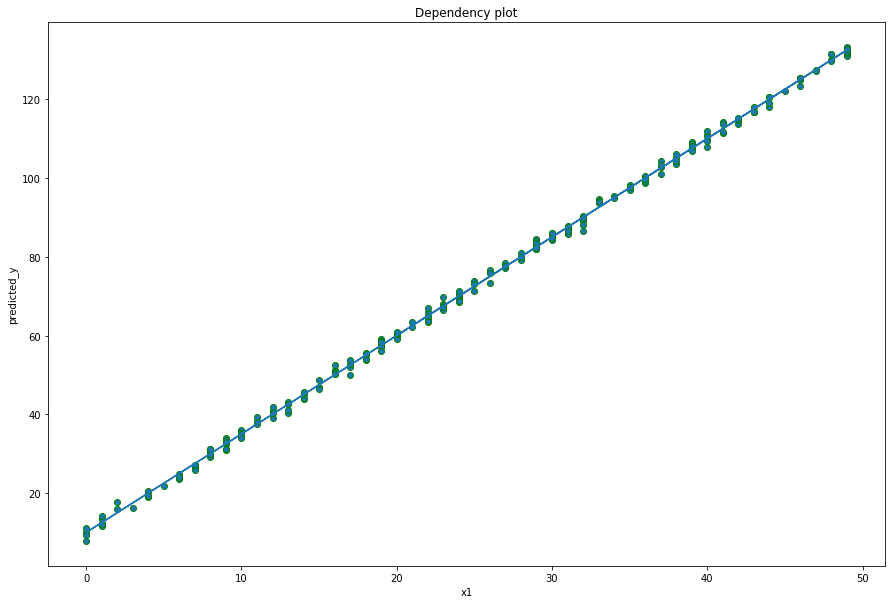

In [7]:
model.draw_regression_line()